In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

In [10]:
# Shared Variables
P = 10 # atm

end_time = 1000
steps = 100000

times = np.linspace(0, end_time, steps)

A1 = 8.26e4
A2 = 1.4e5 
Ea = 88000 # J/mol
R = 8.314 # J/mol*K
T0 = 1000 # K

Ctot = (P)/(R*T0*9.86923e-6)
TiCl40 = Ctot/2
O20 = Ctot/2
print(TiCl40, O20)

initial_conditions = (TiCl40, O20, T0)

60.9363888519898 60.9363888519898


In [11]:
# Thermodynamic Data:

A_TiCl4 = 143.0480
B_TiCl4 = 7.600362
C_TiCl4 = 1.530575
D_TiCl4 = -0.538376
E_TiCl4 = -0.020638

A_O2 = 30.03235
B_O2 = 8.772972
C_O2 = -3.988133
D_O2 = 0.788313
E_O2 = -0.741599

A_TiO2 = 67.29830
B_TiO2 = 18.70940
C_TiO2 = -11.57900
D_TiO2 = 2.449561
E_TiO2 = -1.485471

A_Cl2 = 42.67730
B_Cl2 = -5.009570
C_Cl2 = 1.904621
D_Cl2 = -0.165641
E_Cl2 = -2.098480

In [12]:
# Simple first order, constant T, constant P

def first_order_rates(variables, time):
    """
    Return the right hand side of the ODE
    """
    
    TiCl4, O2, T = variables
    
    k = A1*np.exp(-Ea/(R*T)) * 1e-3
    
    rate_TiCl4 = -k*TiCl4*O2
    rate_O2 = -k*TiCl4*O2
    
    return (rate_TiCl4, rate_O2, 0)

In [13]:
# Actual rate equation, constant T, constant P

def isothermal_rates(variables, time):
    """
    Return the right hand side of the ODE
    """
    
    TiCl4, O2, T = variables
    
    k1 = A1*np.exp(-Ea/(R*T)) * 1e-3

    k2 = A2*np.exp(-Ea/(R*T)) * 1e-3
    
    if O2 - (k1+k2*np.sqrt(O2))*TiCl4*end_time/steps <= 0 or np.isclose(0,O2) :
        return (0, 0, 0)
    
    else:
        rate_TiCl4 = -(k1+k2*np.sqrt(O2))*TiCl4
        rate_O2 = -(k1+k2*np.sqrt(O2))*TiCl4
        
        return (rate_TiCl4, rate_O2, 0)

In [14]:
# Actual rate equation, non-constant T, pressure not accounted for

def isobaric_rates(variables, time):
    """
    Return the right hand side of the ODE
    """
    TiCl4, O2, T = variables
    
    k1 = A1*np.exp(-Ea/(R*T)) * 1e-3

    k2 = A2*np.exp(-Ea/(R*T)) * 1e-3
    
    delHr = (T-726.85)*(12/125) - 102
    
    if O2 - (k1+k2*np.sqrt(O2))*TiCl4*end_time/steps <= 0 or np.isclose(0,O2) :
        return (0, 0, 0)
    
    else:
        rate_TiCl4 = -(k1+k2*np.sqrt(O2))*TiCl4
        rate_O2 = -(k1+k2*np.sqrt(O2))*TiCl4
        
        if initial_conditions[1] < initial_conditions[0]:
            X = -rate_O2/initial_conditions[1]
        else:
            X = -rate_TiCl4/initial_conditions[0]
        
        
        Cp_TiCl4 = A_TiCl4 + B_TiCl4*(T/1000) + C_TiCl4*((T/1000)**2) + D_TiCl4*((T/1000)**3) + E_TiCl4/((T/1000)**2)
        
        Cp_O2 = A_O2 + B_O2*(T/1000) + C_O2*((T/1000)**2) + D_O2*((T/1000)**3) + E_O2/((T/1000)**2)
        
        Cp_TiO2 = A_TiO2 + B_TiO2*(T/1000) + C_TiO2*((T/1000)**2) + D_TiO2*((T/1000)**3) + E_TiO2/((T/1000)**2)
        
        Cp_Cl2 = A_Cl2 + B_Cl2*(T/1000) + C_Cl2*((T/1000)**2) + D_Cl2*((T/1000)**3) + E_Cl2/((T/1000)**2)
        
        
        rate_T = -delHr * np.min(initial_conditions) * X / (Cp_TiCl4 + (O20/TiCl40)*Cp_O2 - Cp_TiO2 - 2*Cp_Cl2)
        
        #print(X, rate_T)
        
        return (rate_TiCl4, rate_O2, rate_T)

In [15]:
first_order_result = odeint(first_order_rates, initial_conditions, times)
TiCl4_first_order = first_order_result[:,0]             
O2_first_order = first_order_result[:,1]

isothermal_result = odeint(isothermal_rates, initial_conditions, times)
TiCl4_isothermal = isothermal_result[:,0]             
O2_isothermal = isothermal_result[:,1]

isobaric_result = odeint(isobaric_rates, initial_conditions, times)
TiCl4_isobaric = isobaric_result[:,0]             
O2_isobaric = isobaric_result[:,1]
Ts_isobaric = isobaric_result[:,2]

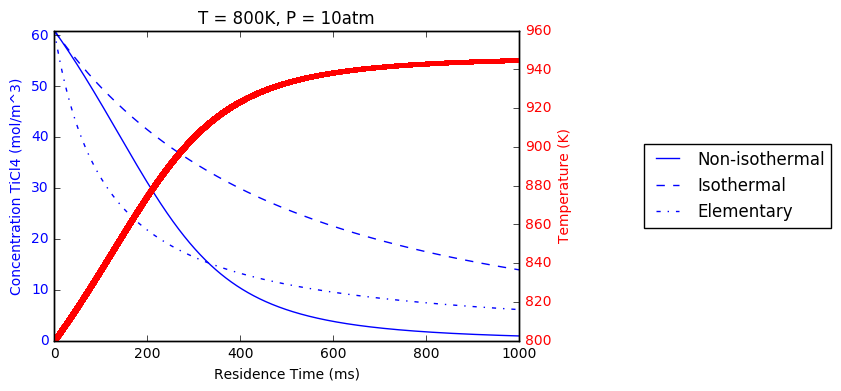

In [17]:
for T0 in [800]:
    initial_conditions = (TiCl40, O20, T0)
    
    first_order_result = odeint(first_order_rates, initial_conditions, times)
    TiCl4_first_order = first_order_result[:,0]             
    O2_first_order = first_order_result[:,1]

    isothermal_result = odeint(isothermal_rates, initial_conditions, times)
    TiCl4_isothermal = isothermal_result[:,0]             
    O2_isothermal = isothermal_result[:,1]

    isobaric_result = odeint(isobaric_rates, initial_conditions, times)
    TiCl4_isobaric = isobaric_result[:,0]             
    O2_isobaric = isobaric_result[:,1]
    Ts_isobaric = isobaric_result[:,2]
    
    fig, ax1 = plt.subplots()
    plt.title('T = ' + str(T0) + 'K, P = ' + str(P) + 'atm')
    ax1.plot(times, TiCl4_isobaric, 'b-', label='Non-isothermal')
    #ax1.plot(times, O2_isobaric, 'b-', label='O2 non-isothermal')

    ax1.plot(times, TiCl4_isothermal, 'b--', label='Isothermal')
    #ax1.plot(times, O2_isothermal, 'b--', label='O2 isothermal')

    ax1.plot(times, TiCl4_first_order, 'b-.', label='Elementary')
    #ax1.plot(times, O2_first_order, 'b-.', label='O2 1st Order')

    ax1.set_xlabel('Residence Time (ms)')

    # Make the y-axis label and tick labels match the line color.
    ax1.set_ylabel('Concentration TiCl4 (mol/m^3)', color='b', )
    for tl in ax1.get_yticklabels():
        tl.set_color('b')

    plt.legend(loc='center left', bbox_to_anchor=(1.25, .5))

    ax2 = ax1.twinx()
    ax2.plot(times, Ts_isobaric, 'r.', label='Temperature')
    # plt.ylim((1780,1790))
    ax2.set_ylabel('Temperature (K)', color='r')
    for tl in ax2.get_yticklabels():
        tl.set_color('r')

    ax1.set_ylim([0, TiCl40])
    #ax2.set_ylim([800,1500])
    plt.savefig('destination_path.tiff', format='tiff', dpi=250)
    plt.show()
   

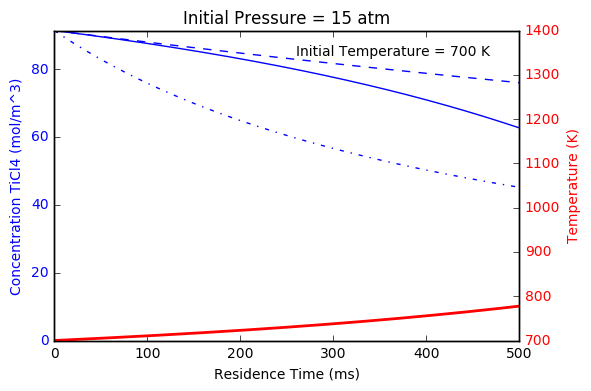

In [20]:
from matplotlib import animation
import matplotlib
matplotlib.rc('animation', html='html5')

#fig = plt.figure()
#ax = fig.add_subplot(111, autoscale_on=False, xlim=(0,20), ylim=(800,1500))
#ax.grid()

fig, ax1 = plt.subplots()
ax1.set_xlabel('Residence Time (ms)')

plt.title('Initial Pressure = ' + str(P) + ' atm')

# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Concentration TiCl4 (mol/m^3)', color='b', )
for tl in ax1.get_yticklabels():
    tl.set_color('b')


ax2 = ax1.twinx()
ax2.set_ylabel('Temperature (K)', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
    
ax1.set_ylim([0, TiCl40])
ax2.set_ylim([700,1400])

ax1.set_xlim([0, end_time])
#ax2.set_xlim([0, end_time])

line1, = ax1.plot([], [], 'b-', label='Non-isothermal')
line2, = ax1.plot([], [], 'b--', label='Isothermal')
line3, = ax1.plot([], [], 'b-.', label='First Order')
line4, = ax2.plot([], [], 'r-', linewidth=2)
temperature_template = 'Initial Temperature = %.0f K'
temperature_text = ax2.text(0.52, 0.92, '', transform=ax2.transAxes)

def init():
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    line4.set_data([], [])
    temperature_text.set_text('')
    return line1, line2, line3, line4, temperature_text

def animate(i):
    if i<=250:
        T0 = 700 + i*2
    else:
        T0 = 1200 - (i-250)*2
    initial_conditions = (TiCl40, O20, T0)
    
    isobaric_result = odeint(isobaric_rates, initial_conditions, times)
    TiCl4_isobaric = isobaric_result[:,0]             
    Ts_isobaric = isobaric_result[:,2]
    
    isothermal_result = odeint(isothermal_rates, initial_conditions, times)
    TiCl4_isothermal = isothermal_result[:,0]
    
    first_order_result = odeint(first_order_rates, initial_conditions, times)
    TiCl4_first_order = first_order_result[:,0]             

    line1.set_data(times, TiCl4_isobaric)
    line2.set_data(times, TiCl4_isothermal)
    line3.set_data(times, TiCl4_first_order)
    line4.set_data(times, Ts_isobaric)

    temperature_text.set_text(temperature_template%T0)
    return line1, line2, line3, line4, temperature_text

anim = animation.FuncAnimation(fig, animate, frames=501, blit=True, init_func=init, interval=20)
anim

In [21]:
FFMpegWriter = animation.writers['ffmpeg']
metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='Movie support!')

# Change the video bitrate as you like and add some metadata.
mywriter = FFMpegWriter(fps=30, bitrate=5000, metadata=metadata)

anim.save("NewestP15atm.mp4", writer=mywriter)

side by side subplots to compare lab and industrial pressures
side by side subplots to compare low, mid, high temperatures

In [ ]:
for steps in range(2,20000,1000):
    times = np.linspace(0, end_time, steps)
    
    first_order_result = odeint(first_order_rates, initial_conditions, times)
    TiCl4_first_order = first_order_result[:,0]             
    O2_first_order = first_order_result[:,1]

    isothermal_result = odeint(isothermal_rates, initial_conditions, times)
    TiCl4_isothermal = isothermal_result[:,0]             
    O2_isothermal = isothermal_result[:,1]

    isobaric_result = odeint(isobaric_rates, initial_conditions, times)
    TiCl4_isobaric = isobaric_result[:,0]             
    O2_isobaric = isobaric_result[:,1]
    Ts_isobaric = isobaric_result[:,2]
    
    print(isobaric_result[int(steps/2),:],isothermal_result[int(steps/2),:])

In [ ]:
for P in [5,10,15]:
    T0=1000
    Ctot = (P)/(R*T0*9.86923e-6)
    TiCl40 = Ctot/2
    O20 = Ctot/2

    initial_conditions = (TiCl40, O20, T0)
    
    first_order_result = odeint(first_order_rates, initial_conditions, times)
    TiCl4_first_order = first_order_result[:,0]             
    O2_first_order = first_order_result[:,1]

    isothermal_result = odeint(isothermal_rates, initial_conditions, times)
    TiCl4_isothermal = isothermal_result[:,0]             
    O2_isothermal = isothermal_result[:,1]

    isobaric_result = odeint(isobaric_rates, initial_conditions, times)
    TiCl4_isobaric = isobaric_result[:,0]             
    O2_isobaric = isobaric_result[:,1]
    Ts_isobaric = isobaric_result[:,2]
    
    fig, ax1 = plt.subplots()
    plt.title('Initial Pressure = ' + str(P) + 'atm')
    ax1.plot(times, TiCl4_isobaric, 'b-', label='Non-isothermal')
    #ax1.plot(times, O2_isobaric, 'b-', label='O2 non-isothermal')

    ax1.plot(times, TiCl4_isothermal, 'b--', label='Isothermal')
    #ax1.plot(times, O2_isothermal, 'b--', label='O2 isothermal')

    ax1.plot(times, TiCl4_first_order, 'b-.', label='Elementary')
    #ax1.plot(times, O2_first_order, 'b-.', label='O2 1st Order')

    ax1.set_xlabel('Residence Time (ms)')

    # Make the y-axis label and tick labels match the line color.
    ax1.set_ylabel('Concentration TiCl4 (mol/m^3)', color='b', )
    for tl in ax1.get_yticklabels():
        tl.set_color('b')

    plt.legend(loc='center left', bbox_to_anchor=(1.25, .5))

    ax2 = ax1.twinx()
    ax2.plot(times, Ts_isobaric, 'r.', label='Temperature')
    # plt.ylim((1780,1790))
    ax2.set_ylabel('Temperature (K)', color='r')
    for tl in ax2.get_yticklabels():
        tl.set_color('r')

    plt.show()